In [316]:
# NAME: VANKUNAVATH VENKATESH
# ENROLMENT NUMBER: 23114106
# BRANCH: CSE

dataset link: [Click Here](https://www.kaggle.com/datasets/brendan45774/test-file)


In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1.Data Cleaning

### Load the dataset and inspect its structure

In [321]:
df= pd.read_csv("C:/Users/vanku/Downloads/Titanic-Dataset.csv")

In [322]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [324]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling missing values & duplicated rows

In [326]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [327]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [328]:
df.fillna(df.mode().iloc[0], inplace=True)

In [329]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

###  treating  outliers using Interquartile Range (IQR)

In [331]:
def treat_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Option 1: Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df
df= treat_outliers_iqr(df, numerical_cols)

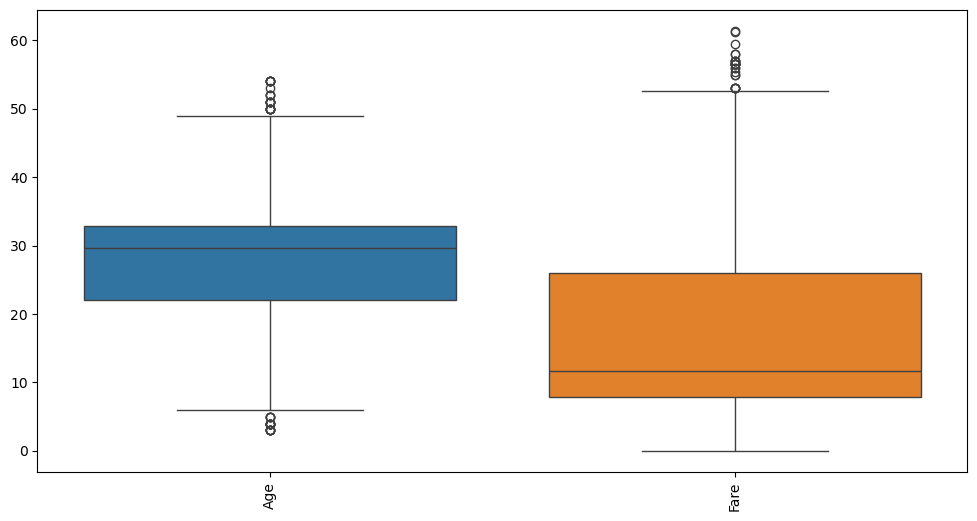

In [332]:
numerical_cols = ['Age', 'Fare']
categorical_cols = ['Sex', 'Embarked', 'Pclass']
# Boxplot to visualize outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.show()

### Standardizing  categorical values

In [334]:
def standardize_categorical(df, columns):
    for col in columns:
        # Convert to lowercase and strip spaces
        df[col] = df[col].astype(str).str.lower().str.strip()
        
        # Fix known typos (example mappings)
        corrections = {
            'sex': {'malee': 'male', 'femle': 'female'},  # Example typos
            'embarked': {'s ': 's', 'c ': 'c', 'q ': 'q'},
            'pclass': {'first': '1', 'second': '2', 'third': '3'}  # Standardizing class names
        }
        if col in corrections:
            df[col] = df[col].replace(corrections[col])
        
    
    return df
df= standardize_categorical(df, categorical_cols)

In [335]:
print(df[categorical_cols].head())

      Sex Embarked Pclass
0    male        s      3
2  female        s      3
3  female        s      1
4    male        s      3
5    male        q      3


# 2.Exploratory Data Analysis (EDA)

## Univariate Analysis (Single-Variable Exploration)

### Summary statistics

In [339]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,447.883008,0.334262,28.462754,0.413649,0.317549,17.193204
std,259.549777,0.472061,10.034525,0.855001,0.784792,13.244507
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,220.250000,0.000000,22.000000,0.000000,0.000000,7.889575
50%,447.500000,0.000000,29.699118,0.000000,0.000000,11.750000
75%,673.500000,1.000000,32.875000,1.000000,0.000000,25.928150
max,891.000000,1.000000,54.000000,5.000000,6.000000,61.379200


In [340]:
print("Variance:\n", df[numerical_cols].var())
print("Skewness:\n", df[numerical_cols].skew())
print("Kurtosis:\n", df[numerical_cols].kurt())

Variance:
 Age     100.691689
Fare    175.416971
dtype: float64
Skewness:
 Age     0.009269
Fare    1.494390
dtype: float64
Kurtosis:
 Age     0.434948
Fare    1.634861
dtype: float64


### Frequency distributions for categorical variables.

In [342]:
for col in categorical_cols:
    print(f"{df[col].value_counts()}")

Sex
male      489
female    229
Name: count, dtype: int64
Embarked
s    543
c    104
q     71
Name: count, dtype: int64
Pclass
3    462
2    162
1     94
Name: count, dtype: int64


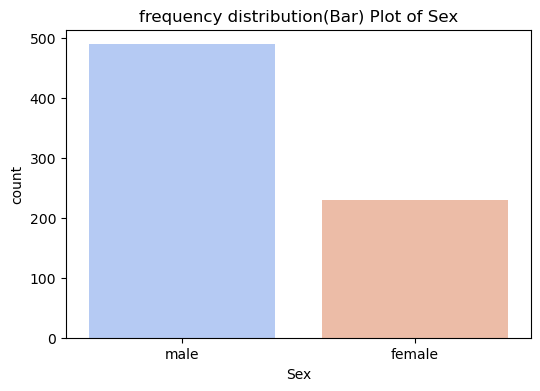

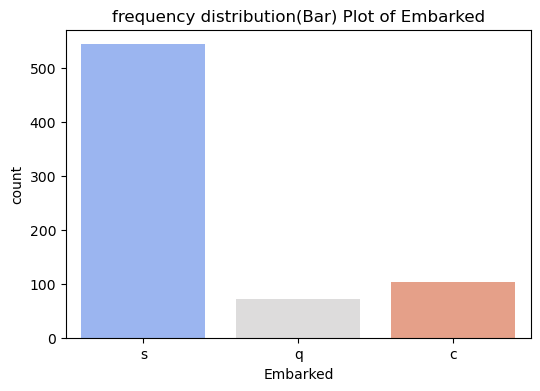

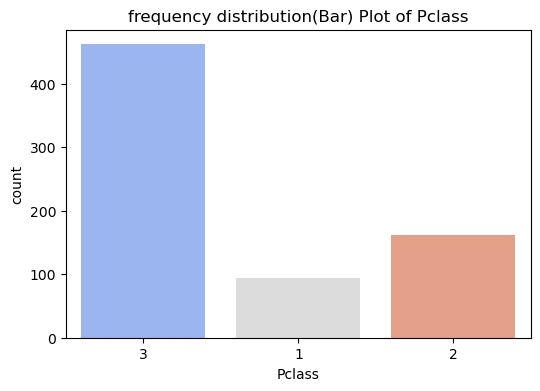

In [343]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="coolwarm")
    plt.title(f"frequency distribution(Bar) Plot of {col}")
    plt.show()

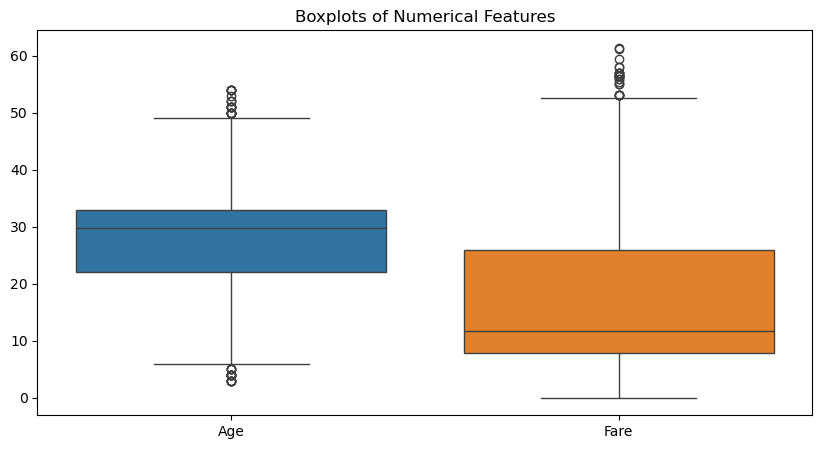

In [344]:
# Boxplots for numerical variables
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots of Numerical Features")
plt.show()

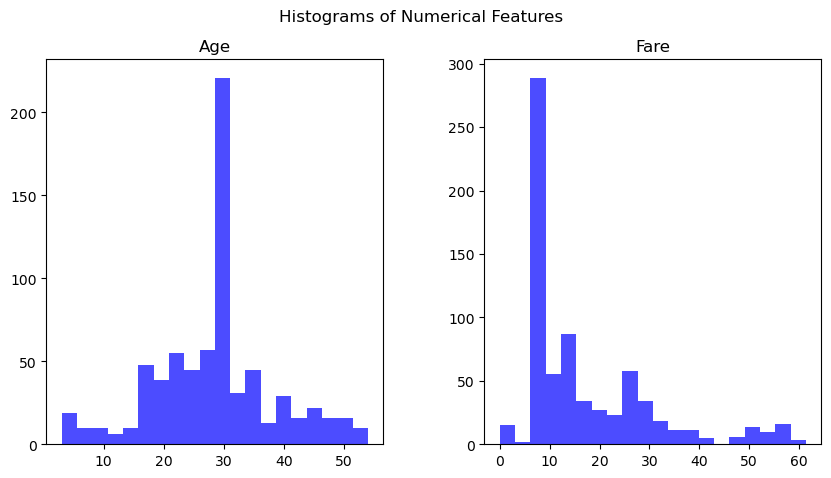

In [345]:
df[numerical_cols].hist(figsize=(10, 5), bins=20, grid=False, color='blue', alpha=0.7)
plt.suptitle("Histograms of Numerical Features")
plt.show()

## Bivariate Analysis (Two-Variable Exploration)

### Correlation matrix 

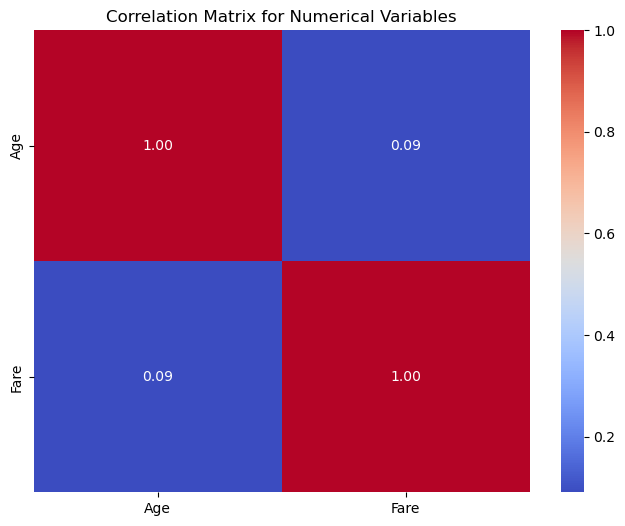

In [348]:
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

### Scatter plots for continuous variable relationships

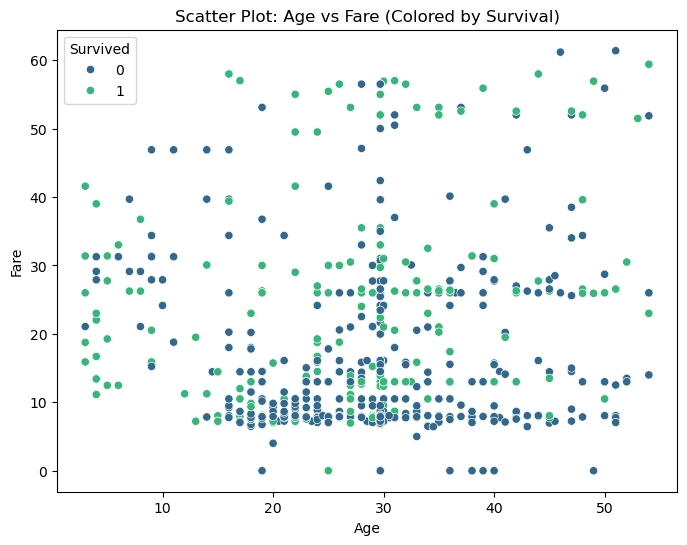

In [350]:
# Scatter plot between 'age' and 'fare'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', palette='viridis')
plt.title('Scatter Plot: Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### Bar plots, violin plots, and box plots to compare categorical and numerical variables.

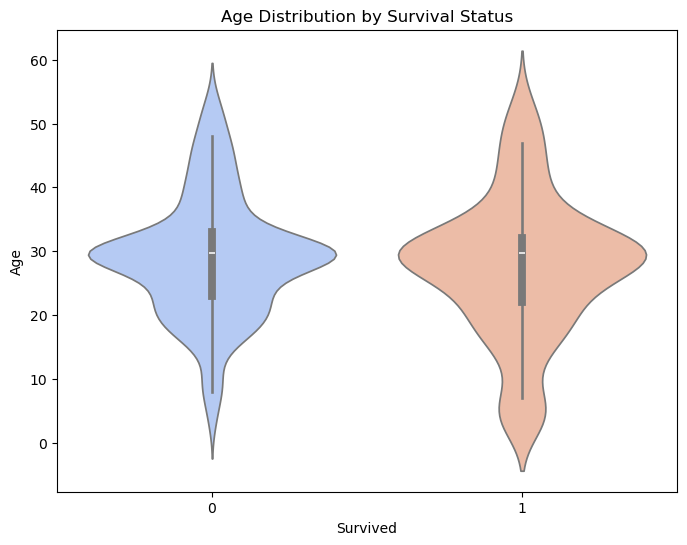

In [352]:
# Violin plot: Age distribution by survival status
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

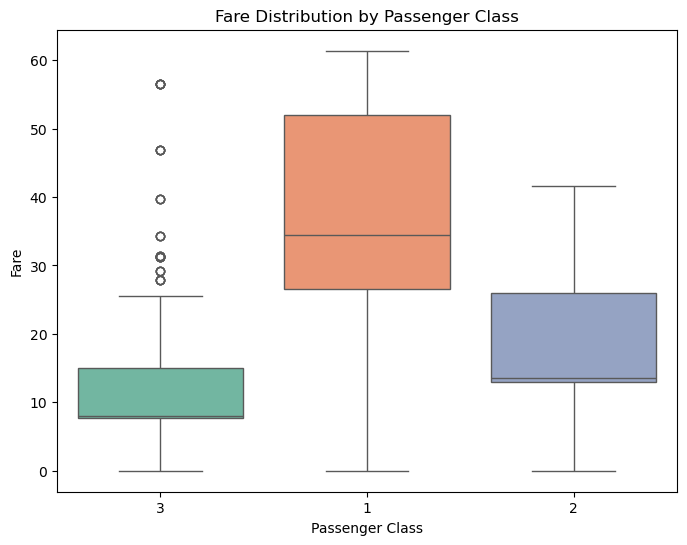

In [353]:
# Box plot: Fare distribution by passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

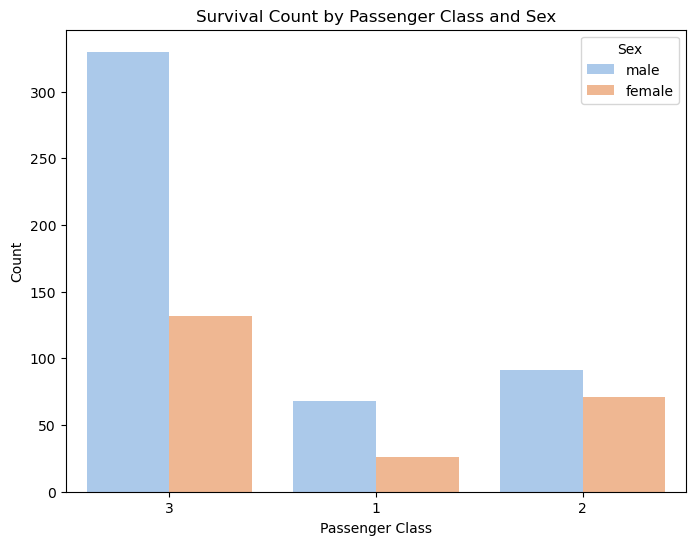

In [354]:
# Grouped bar plot: Survival count by passenger class and sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Sex', data=df, palette='pastel')
plt.title('Survival Count by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

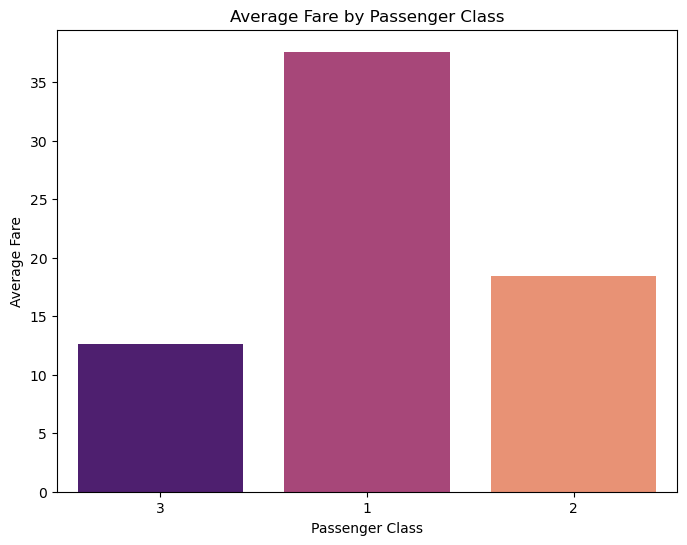

In [355]:
# Bar plot: Average fare by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Fare', data=df, ci=None, palette='magma')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()

## Multivariate Analysis (Multiple Variables Exploration)

### Pair plots to analyze multiple relationships simultaneously

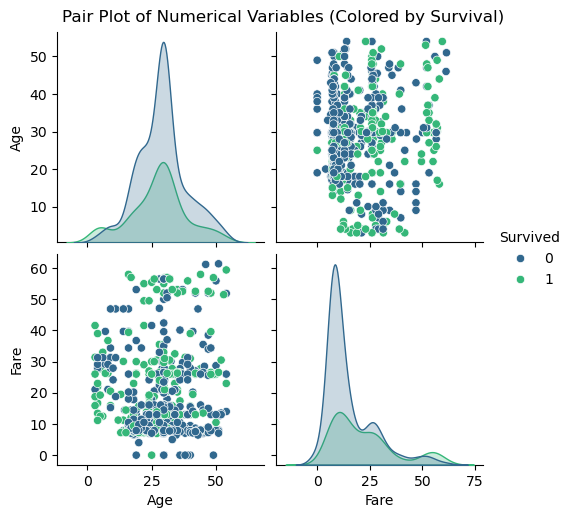

In [358]:
# Create pair plot
sns.pairplot(df[numerical_cols + ['Survived']], hue='Survived', palette='viridis')
plt.suptitle('Pair Plot of Numerical Variables (Colored by Survival)', y=1.02)
plt.show()

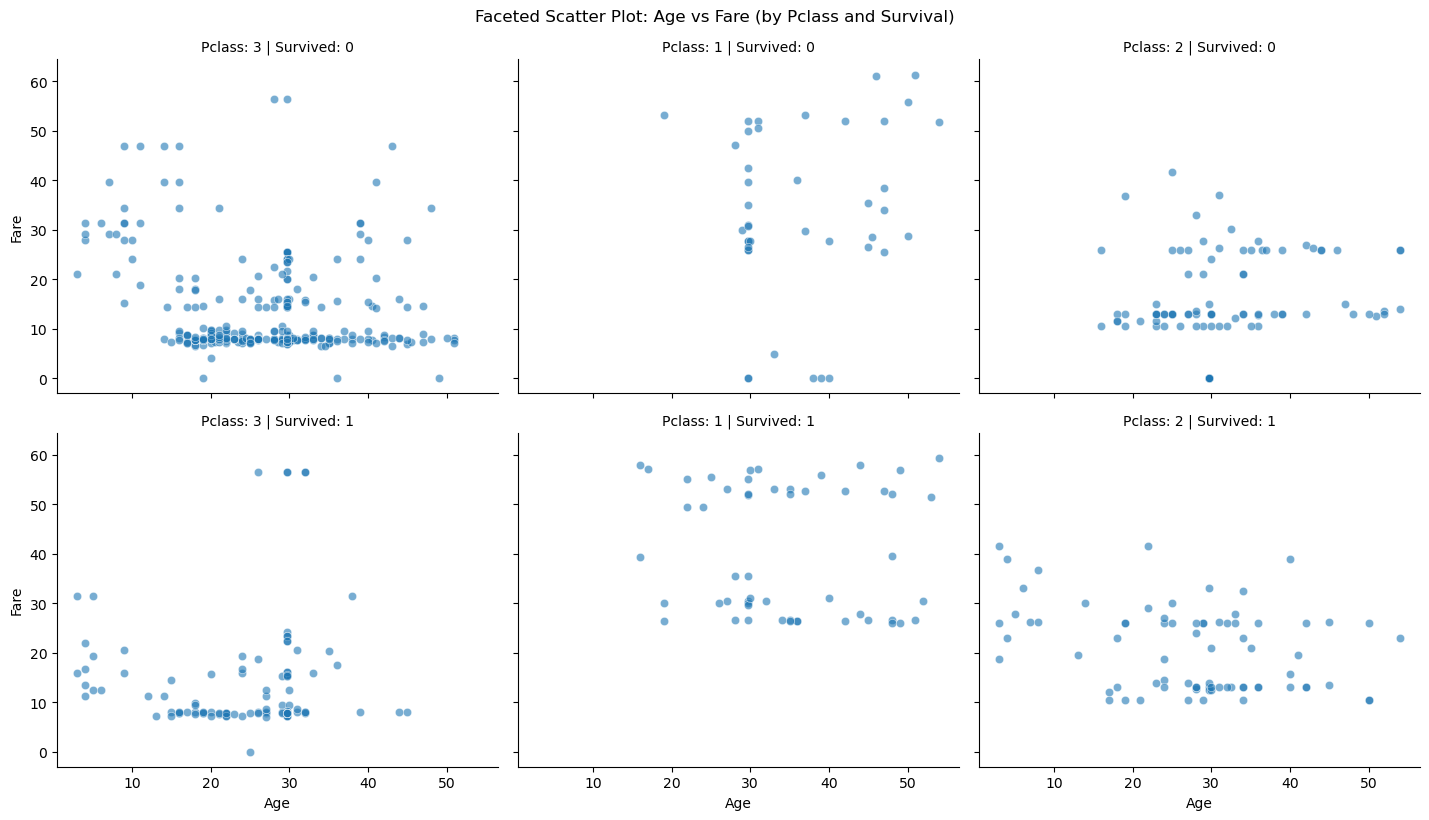

In [359]:
# Faceted scatter plot: Age vs Fare, faceted by passenger class and survival
g = sns.FacetGrid(df, col='Pclass', row='Survived', height=4, aspect=1.2)
g.map(sns.scatterplot, 'Age', 'Fare', alpha=0.6)
g.set_axis_labels('Age', 'Fare')
g.set_titles('Pclass: {col_name} | Survived: {row_name}')
plt.suptitle('Faceted Scatter Plot: Age vs Fare (by Pclass and Survival)', y=1.02)
plt.show()

### Heatmaps to visualize correlations among multiple variables.

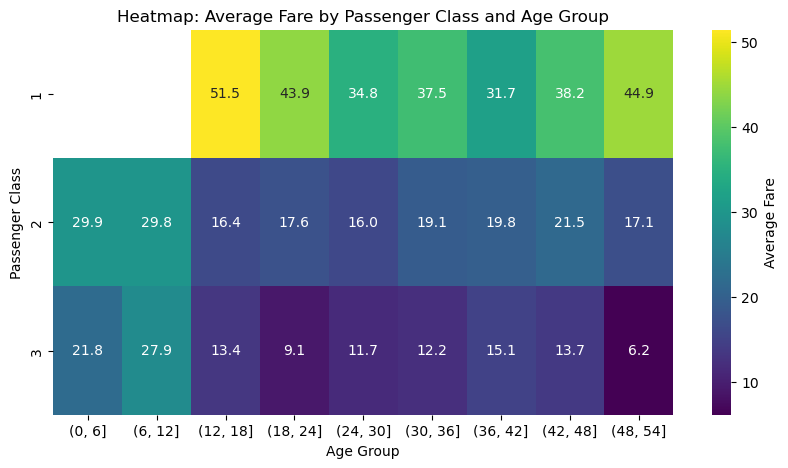

In [361]:
df['Age_group'] = pd.cut(df['Age'], bins=range(0, 60,6))
heatmap_data = df.groupby(['Pclass', 'Age_group'])['Fare'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='viridis', cbar_kws={'label': 'Average Fare'})
plt.title('Heatmap: Average Fare by Passenger Class and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Passenger Class')
plt.show()

### Grouped comparisons to identify combined effects of multiple features.

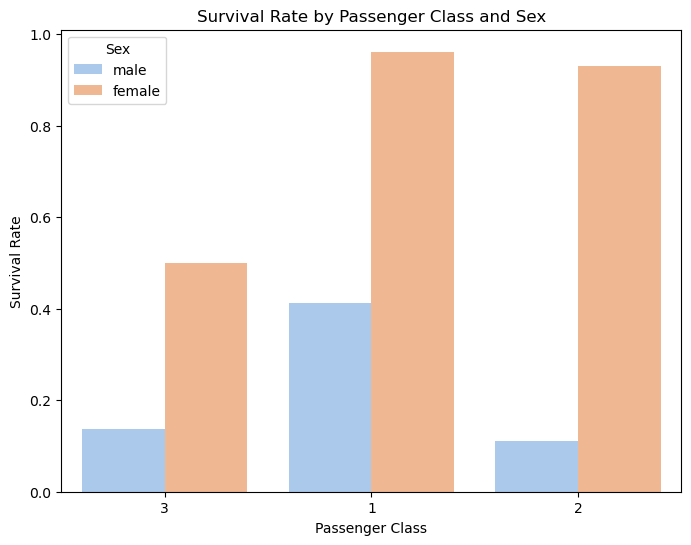

In [363]:
# Grouped bar plot: Survival rate by passenger class and sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None, palette='pastel')
plt.title('Survival Rate by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.show()